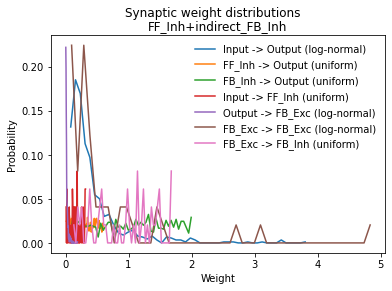

In [1]:
%run simulate_dynamic_model --config_file_path=config/simulate_config_5_FF_Inh+indirect_FB_Inh_Hebb_weight_norm.yaml --plot

In [2]:
 channel_conductance_dynamics_dict, net_current_dynamics_dict, cell_voltage_dynamics_dict, \
    network_activity_dynamics_dict, mean_network_activity_dict = \
        test_network(t, sorted_input_patterns, num_units_dict, synapse_tau_dict, cell_tau_dict,
                                   weight_dict, weight_config_dict, activation_function_dict, synaptic_reversal_dict, time_point)
initial_activity_dict = deepcopy(mean_network_activity_dict)
initial_weight_dict = deepcopy(weight_dict)
print('Inital test took %.1f s' % (time.time() - start_time))
current_time = time.time()

Inital test took 75.3 s


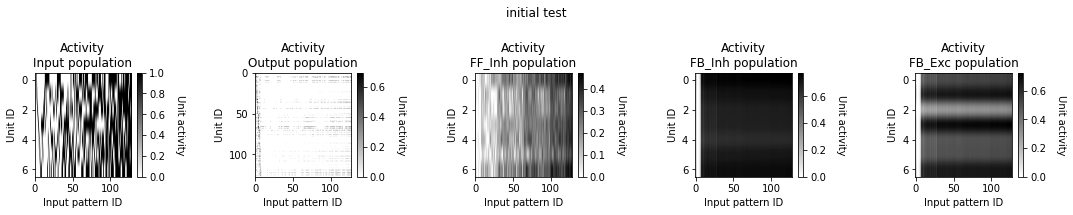

In [3]:
plot_activity_summary(initial_activity_dict, description='initial test')

In [4]:
    current_time = time.time()
    channel_conductance_dynamics_dict, net_current_dynamics_dict, cell_voltage_dynamics_dict, \
    network_activity_dynamics_dict, train_network_activity_history_dict, weight_history_dict = \
        train_network(t, sorted_input_patterns, num_units_dict, synapse_tau_dict, cell_tau_dict,
                     weight_dict, weight_config_dict, activation_function_dict, synaptic_reversal_dict, time_point, train_epochs, train_seed)
    print('Train took %.1f s' % (time.time() - current_time))
    current_time = time.time()

Train took 81.7 s


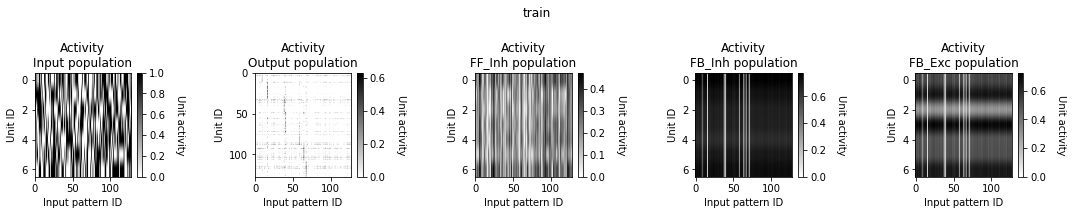

In [5]:
plot_activity_summary(train_network_activity_history_dict, description='train')

In [6]:
    current_time = time.time()
    channel_conductance_dynamics_dict, net_current_dynamics_dict, cell_voltage_dynamics_dict, \
    network_activity_dynamics_dict, mean_network_activity_dict = \
        test_network(t, sorted_input_patterns, num_units_dict, synapse_tau_dict, cell_tau_dict,
                                   weight_dict, weight_config_dict, activation_function_dict, synaptic_reversal_dict, time_point)
    final_activity_dict = deepcopy(mean_network_activity_dict)
    print('Final test took %.1f s' % (time.time() - current_time))

Final test took 83.4 s


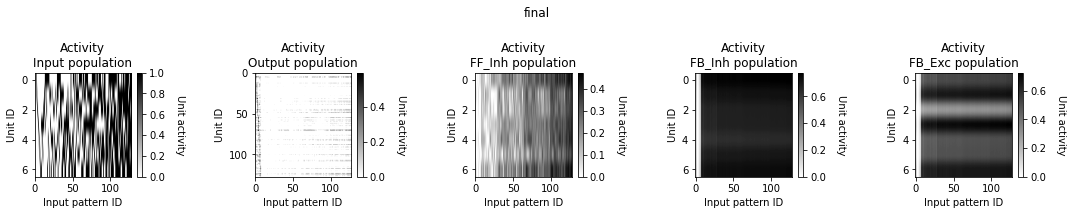

In [7]:
plot_activity_summary(final_activity_dict, description='final')

In [12]:
delta_weight = np.subtract(weight_history_dict['Output']['Input'][-1], weight_history_dict['Output']['Input'][0])
print(np.min(delta_weight))
print(np.max(delta_weight))
print(np.mean(delta_weight))
print(np.min(initial_weight_dict['Output']['Input']))
print(np.max(initial_weight_dict['Output']['Input']))
print(np.mean(initial_weight_dict['Output']['Input']))

0.0
5.646620563369257
1.48180838333804
0.006796112363165174
3.803631236062121
0.3891419


In [14]:
np.sum(initial_weight_dict['Output']['Input'], axis=0)

array([3.23297034, 2.71159543, 3.67278555, 1.13867102, 2.56862967,
       3.75799442, 2.5860006 , 1.34194231, 1.58824224, 3.26427779,
       2.79361165, 3.59439649, 2.41899228, 1.67856365, 1.45370203,
       4.42289805, 5.33522983, 1.20818242, 3.63308308, 1.96371128,
       1.4370119 , 4.73864858, 2.60860406, 2.55677253, 3.64729186,
       1.7538649 , 3.57101849, 3.74561758, 2.64847308, 2.40705348,
       2.32025231, 3.19332059, 3.51890104, 1.86889063, 2.03782523,
       2.35318142, 2.31503556, 2.21586773, 4.33823201, 5.95013838,
       2.65234451, 1.68211105, 2.46288479, 1.70401779, 2.6919387 ,
       1.40054514, 1.99923385, 4.62498623, 4.14859152, 2.04625641,
       2.65169447, 3.71033132, 1.65414618, 2.14890841, 3.72329571,
       1.69531587, 4.01697518, 4.9314568 , 1.46308683, 3.68489693,
       5.73025636, 2.01627355, 1.60417245, 1.52496474, 5.23296741,
       3.33727364, 4.6137845 , 2.26061421, 1.38199803, 2.78234158,
       5.73265995, 1.93698793, 2.58058066, 2.22987011, 0.99653

In [15]:
def Hebb_weight_norm(weights, post_activity, pre_activity, learning_rate):
    delta_weights = learning_rate * np.outer(pre_activity, post_activity)
    weight_scale = np.sum(weights, axis=0)
    weights = weights + delta_weights
    weights = weights / np.sum(weights, axis=0) * weight_scale
    return weights

In [16]:
post_activity = train_network_activity_history_dict['Output'][0]
pre_activity = train_network_activity_history_dict['Input'][0]
weights = initial_weight_dict['Output']['Input']
learning_rate = 0.1

In [17]:
initial_weight_scale = np.sum(initial_weight_dict['Output']['Input'], axis=0)

In [18]:
new_weights = Hebb_weight_norm(weights, post_activity, pre_activity, learning_rate)

In [19]:
new_weight_scale = np.sum(new_weights, axis=0)

In [20]:
np.all(initial_weight_scale==new_weight_scale)

False

In [9]:
delta_weights = weight_history_dict['Output']['Input'][-1] - initial_weight_dict['Output']['Input']
print(np.min(delta_weights))
print(np.max(delta_weights))
print(np.mean(delta_weights))

-1.2769412882879836
0.32530150651205236
1.4869058365515489e-18


In [24]:
delta_weight_scale = new_weight_scale - initial_weight_scale
print(np.min(delta_weight_scale))
print(np.max(delta_weight_scale))
print(np.mean(delta_weight_scale))

-8.881784197001252e-16
8.881784197001252e-16
1.214306433183765e-17


In [32]:
np.all(weight_dict['Output']['Input']==weight_history_dict['Output']['Input'][-1])

True

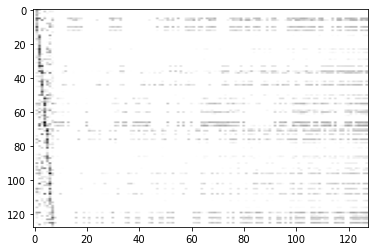

In [36]:
argmax_indices = np.argmax(initial_activity_dict['Output'], axis=0)
initial_sorted_indices = np.argsort(argmax_indices)
im1 = plt.imshow(initial_activity_dict['Output'][:, initial_sorted_indices].transpose(), aspect='auto', cmap='binary')

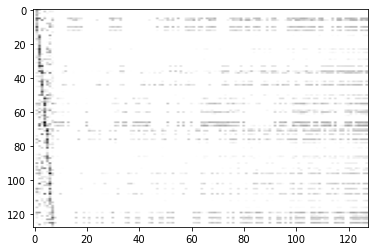

In [37]:
im1 = plt.imshow(final_activity_dict['Output'][:, initial_sorted_indices].transpose(), aspect='auto', cmap='binary')

In [42]:
print(weight_config_dict)

{'Output': {'Input': {'dist_type': 'log-normal', 'mean_magnitude': 0.3891419, 'connection_type': 'exc', 'learning_rule': 'Hebb_weight_norm', 'learning_rule_params': {'learning_rate': 0.1}}, 'FF_Inh': {'dist_type': 'uniform', 'mean_magnitude': 0.3011067, 'connection_type': 'inh'}, 'FB_Inh': {'dist_type': 'uniform', 'mean_magnitude': 0.9994808, 'connection_type': 'inh'}}, 'FF_Inh': {'Input': {'dist_type': 'uniform', 'mean_magnitude': 0.1640408, 'connection_type': 'exc'}}, 'FB_Exc': {'Output': {'dist_type': 'log-normal', 'mean_magnitude': 0.0167715, 'connection_type': 'exc'}, 'FB_Exc': {'dist_type': 'log-normal', 'mean_magnitude': 0.7891835, 'connection_type': 'exc'}}, 'FB_Inh': {'FB_Exc': {'dist_type': 'uniform', 'mean_magnitude': 0.8583403, 'connection_type': 'exc'}}}
